In [1]:
## Visualisation for Relative Fixations

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
from ast import literal_eval
import numpy as np

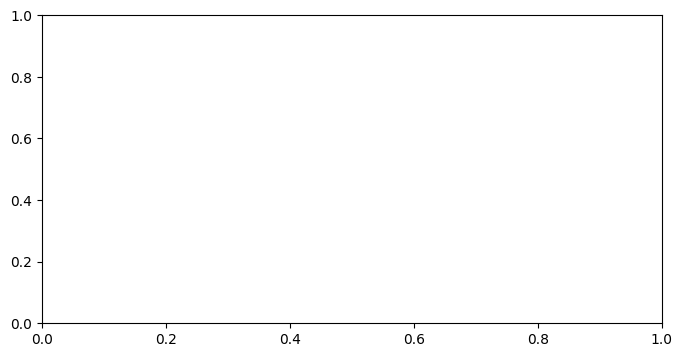

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))
mypalette = sns.diverging_palette(150, 275, s=80, l=55, n=2)

In [4]:
def visualize_fixation_order(df, sentLen:int, sentence_id=0, max_fixations=100, use_sentence_id=False):
    filtered_df = df
    if use_sentence_id:
        filtered_df = df[["word_id", "Scan_path", "sentence_id"]]
        filtered_df = filtered_df[filtered_df["sentence_id"] == sentence_id]
        sentLen = len(filtered_df)
    else:
        # Doesn't have filtered word id
        filtered_df["word_text"] = filtered_df["word_id"].str.split("_").str[0]
    dictTargetOrder = {}
    minFixOrder = float("inf")
    maxFixOrder = -float("inf")

    for i, sPath in enumerate(filtered_df.Scan_path):
        sPath = literal_eval(sPath)
        for fixOrder in sPath:
            maxFixOrder = max(maxFixOrder, fixOrder)
            minFixOrder = min(minFixOrder, fixOrder)
            dictTargetOrder[fixOrder] = i

    numberFix = min(max_fixations, maxFixOrder-minFixOrder) if len(dictTargetOrder) > 0 else 0
    target = [None] * int(numberFix)
    plotX = []
    plotY = []
    for i in range(len(target)):
        if i in dictTargetOrder:
            word_id = dictTargetOrder[i]
            target[i] = word_id
            plotX.append(i)
            plotY.append(word_id)

    plt.plot(plotY, plotX, color = mypalette[0])
    plt.scatter(plotY, plotX, color = mypalette[0], s=60)
    plt.ylabel("Fixation Number")
    plt.xlabel("Word Order Sentence")
    plt.xticks([i for i in range(0, sentLen+2)])
    if use_sentence_id:
        print(" ".join(filtered_df.word_id))
    else:
        print(" ".join(filtered_df.word_text))

In [5]:
fix_file = path.join("..", "pre_processed_data", "fixation_data_per_part", "p4-lab-control_mturk_EN_v02_lab_cognition_fix_dict.csv")

In [6]:
df = pd.read_csv(fix_file)

In [7]:
df.text_id.unique()

array(['meco_para_3', 'a_Computationalcomplexitytheory_1',
       'a_Computationalcomplexitytheory_4', 'a_SuperBowl50_2',
       'a_AmericanBroadcastingCompany_0', 'a_FrenchandIndianWar_0',
       'a_Islamism_1', 'a_SkyUnitedKingdom_0', 'a_Construction_0',
       'a_DoctorWho_3'], dtype=object)

In competitive sports, doping is the use of banned performance-enhancing drugs by athletic competitors.


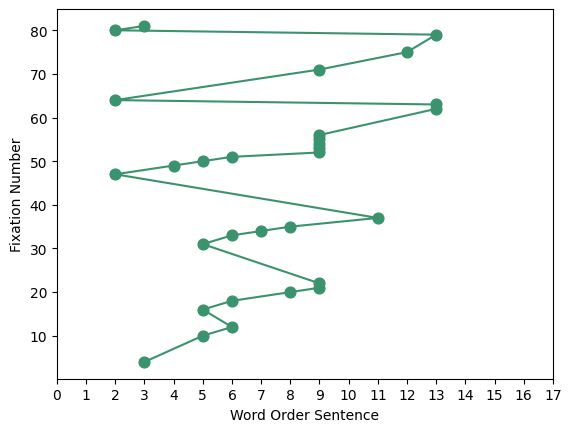

In [8]:
visualize_fixation_order(df[df.text_id == "meco_para_3"].iloc[:14, :], 16)

Construction is the process of constructing a building or infrastructure.


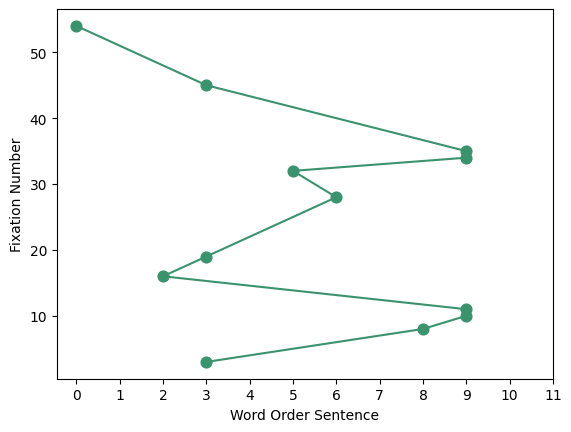

In [9]:
visualize_fixation_order(df[df.text_id == "a_Construction_0"].iloc[:10], 10)

In [10]:
fix_file = path.join("..", "pre_processed_data", "fixation_data_per_part", "p19-volunteer-cognition_mturk_EN_v18_cognition_volunteer_fix_dict.csv")

In [11]:
df = pd.read_csv(fix_file)

In [12]:
df.text_id.unique()

array(['meco_para_11', 'a_SuperBowl50_3', 'a_FrenchandIndianWar_0',
       'a_VictoriaAustralia_3', 'a_HarvardUniversity_0', 'a_Oxygen_1',
       'a_MartinLuther_3', 'a_HarvardUniversity_1', 'a_Chloroplast_2',
       'a_SkyUnitedKingdom_1'], dtype=object)

C:\Users\tyagu\AppData\Local\Temp\ipykernel_20720\1180458081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["word_text"] = filtered_df["word_id"].str.split("_").str[0]


In Europe, the North American theater of the Seven Years' War usually is not given a separate name. The entire international conflict is known as the Seven Years' War. "Seven Years" refers to events in Europe, from the official declaration of war in 1756 to the signing of the peace treaty in 1763. These dates do not correspond with the fighting on mainland North America, where the fighting between the two colonial powers was largely concluded in six years, from the Battle of Jumonville Glen in 1754 to the capture of Montreal in 1760.


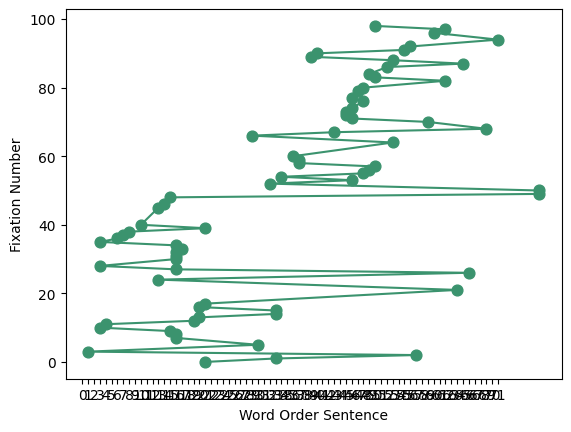

In [13]:
visualize_fixation_order(df[df.text_id == "a_FrenchandIndianWar_0"], 70)

Luther's hymns were frequently evoked by particular events in his life and the unfolding Reformation. This behavior started with his learning of the execution of Johann Esch and Heinrich oes, the first individuals to be martyred by the Roman Catholic Church for Lutheran views, prompting Luther to write the hymn "Ein neues Lied wir heben an" ("A new song we raise"), which is generally known in English by John CC. Messenger's — translation by the title and first line "Flung to the Heedless Winds" and sung to the tune Ibstone composed in 1875 by Maria C. Tiddeman.


C:\Users\tyagu\AppData\Local\Temp\ipykernel_20720\1180458081.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["word_text"] = filtered_df["word_id"].str.split("_").str[0]


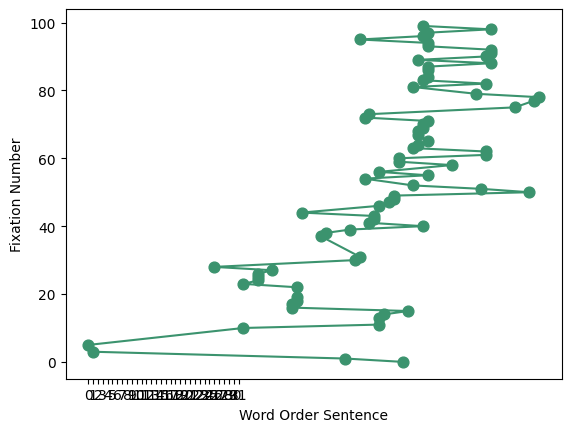

In [14]:
visualize_fixation_order(df[df.text_id == "a_MartinLuther_3"], 30)

In [15]:
meco_fix_data = pd.read_csv("joint_fix_trimmed.csv")

C:\Users\tyagu\AppData\Local\Temp\ipykernel_20720\2035887868.py:1: DtypeWarning: Columns (71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  meco_fix_data = pd.read_csv("joint_fix_trimmed.csv")


In [16]:
meco_fix_data.columns

Index(['subid', 'trialid', 'itemid', 'cond', 'fixid', 'start', 'stop', 'xs',
       'ys', 'xn', 'yn', 'ym', 'dur', 'sac.in', 'sac.out', 'type', 'blink',
       'line', 'line.change', 'line.let', 'line.word', 'letternum', 'letter',
       'wordnum', 'word', 'ianum', 'ia', 'sentnum', 'sent', 'sent.nwords',
       'trial.nwords', 'word.fix', 'word.run', 'word.runid', 'word.run.fix',
       'word.firstskip', 'word.refix', 'word.launch', 'word.land',
       'word.cland', 'word.reg.out', 'word.reg.in', 'word.reg.out.to',
       'word.reg.in.from', 'ia.fix', 'ia.run', 'ia.runid', 'ia.run.fix',
       'ia.firstskip', 'ia.refix', 'ia.launch', 'ia.land', 'ia.cland',
       'ia.reg.out', 'ia.reg.in', 'ia.reg.out.to', 'ia.reg.in.from',
       'sent.word', 'sent.fix', 'sent.run', 'sent.runid', 'sent.run.fix',
       'sent.firstskip', 'sent.refix', 'sent.reg.out', 'sent.reg.in',
       'sent.reg.out.to', 'sent.reg.in.from', 'lang', 'renamed_trial', 'trial',
       'supplementary_id', 'uniform_id'],


In [17]:
meco_fix_data.lang.unique()

array(['du', 'ee', 'en', 'fi', 'ge', 'gr', 'he', 'it', 'ko', 'no', 'ru',
       'sp', 'tr'], dtype=object)

In [18]:
meco_fix_data[meco_fix_data.lang == "en"].subid.unique()

array(['macmo10', 'macmo101', 'macmo102', 'macmo11', 'macmo14', 'macmo17',
       'macmo18', 'macmo21', 'macmo26', 'macmo27', 'macmo28', 'macmo03',
       'macmo36', 'macmo37', 'macmo38', 'macmo39', 'macmo47', 'macmo49',
       'macmo52', 'macmo55', 'macmo57', 'macmo06', 'macmo60', 'macmo61',
       'macmo70', 'macmo72', 'macmo74', 'macmo76', 'macmo78', 'macmo79',
       'macmo82', 'macmo83', 'macmo84', 'macmo85', 'macmo86', 'macmo87',
       'macmo88', 'macmo89', 'macmo90', 'macmo91', 'macmo93', 'macmo94',
       'macmo95', 'macmo97', 'macmo98', 'macmo99'], dtype=object)

In [19]:
meco_fix_data[meco_fix_data.lang == "en"].groupby(["trialid", "renamed_trial"]).size().reset_index()[["trialid", "renamed_trial"]]

,trialid,renamed_trial
0,1.0,In ancient Roman religion and
1,2.0,"The shaka sign, sometimes known"
2,3.0,"In competitive sports, doping is"
3,4.0,The thylacine was the largest
4,5.0,World Environment Day (WED) is
5,6.0,A monocle is a type
6,7.0,Wine tasting is the sensory
7,8.0,Orange juice is a liquid
8,9.0,Beekeeping is the maintenance of
9,10.0,A national flag is a


In [20]:
meco_subject = "macmo21"
meco_subject_fixation = meco_fix_data[meco_fix_data.subid == meco_subject]

In [21]:
def visualize_fixation_order_meco(df, trial_id, sentence_id, sentLen:int):
    fixOrder = df[(df.trialid == trial_id) & (df.sentnum == sentence_id)]["sent.word"]
    numberFix = len(fixOrder)
    wordIds = [i for i in range(numberFix)]
    plt.plot(fixOrder, wordIds, color = mypalette[1])
    plt.scatter(fixOrder, wordIds, color = mypalette[1], s=60)
    plt.ylabel("Fixation Number")
    plt.xlabel("Word Index in Sentence")
    plt.xticks([i for i in range(0, sentLen+2)])
    

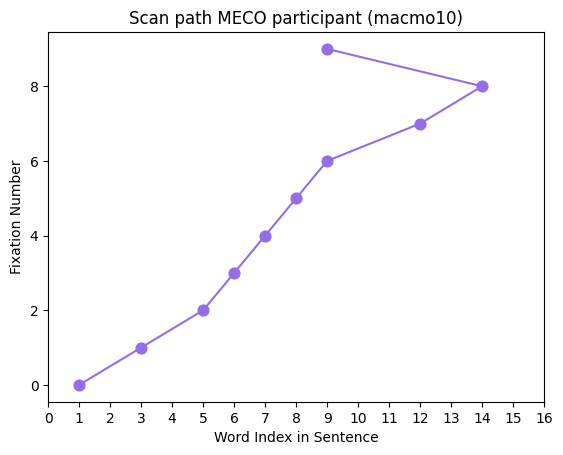

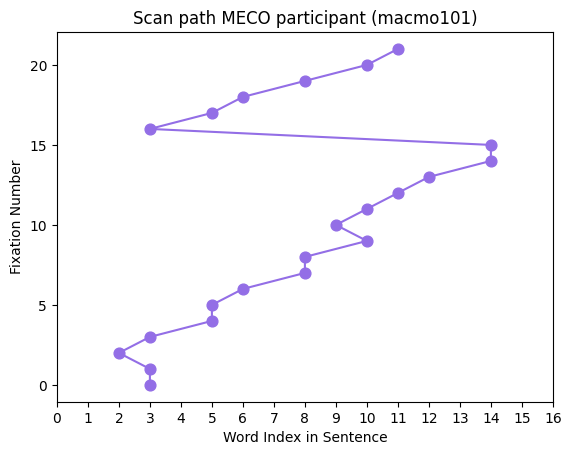

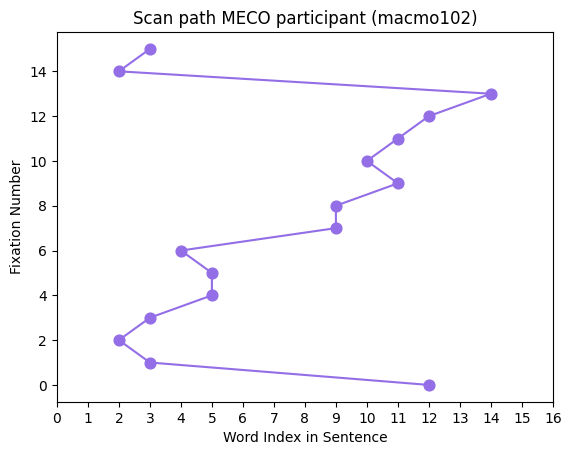

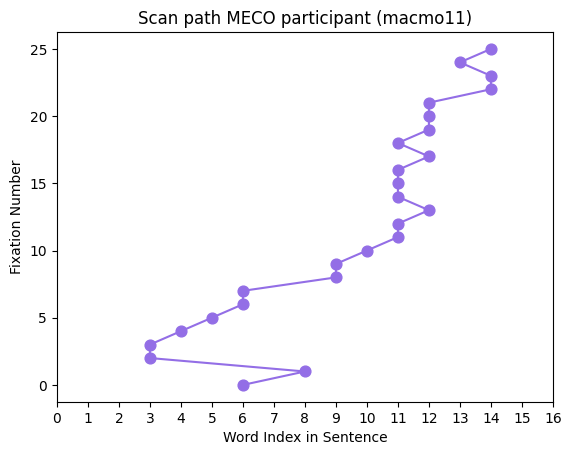

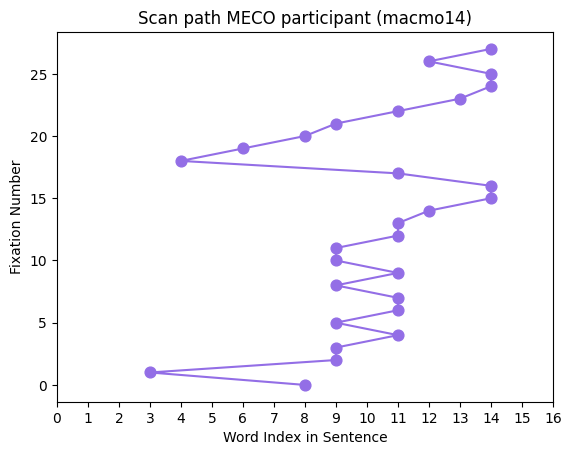

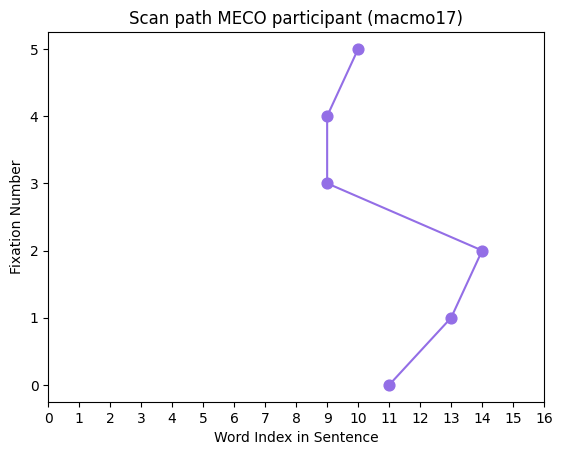

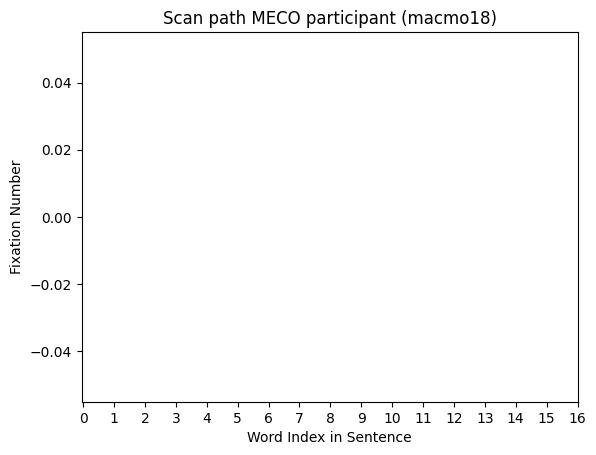

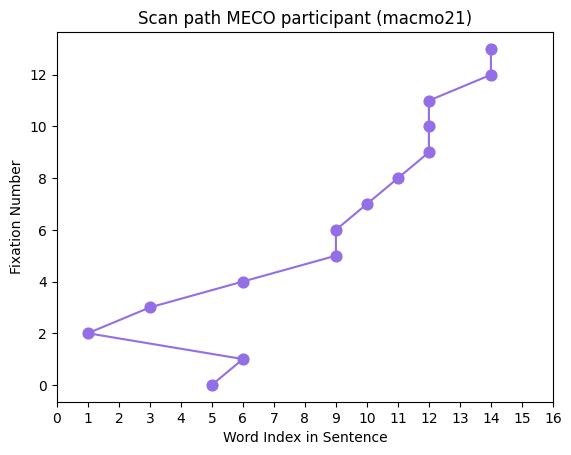

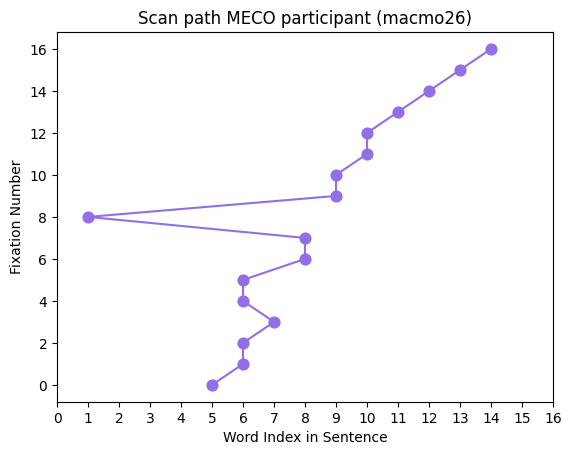

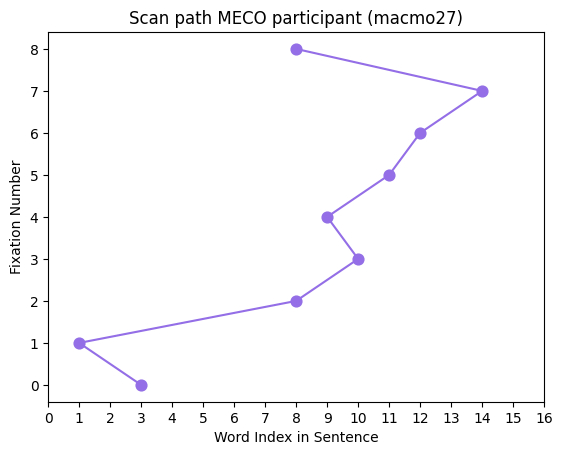

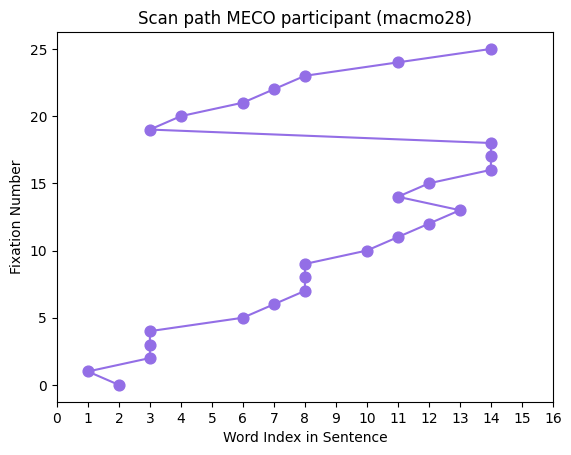

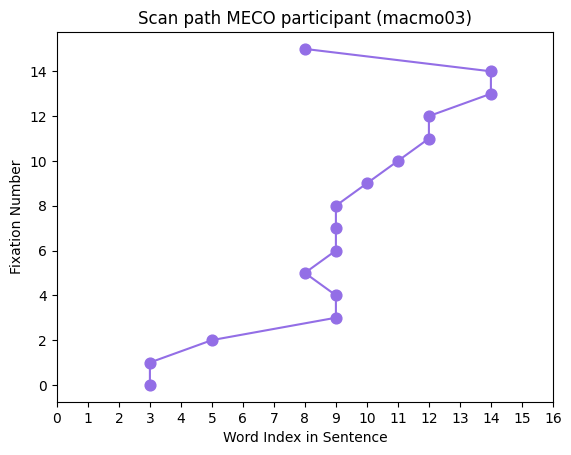

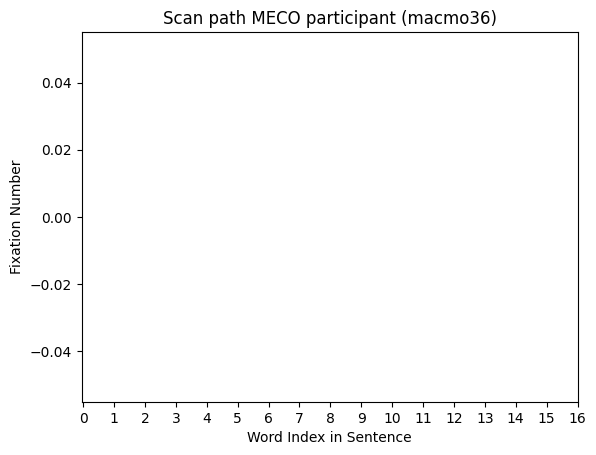

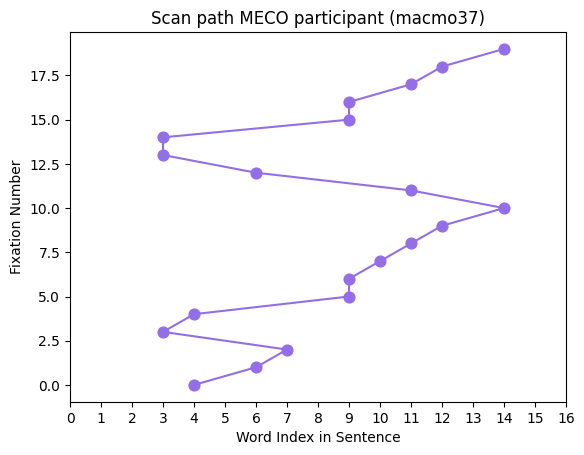

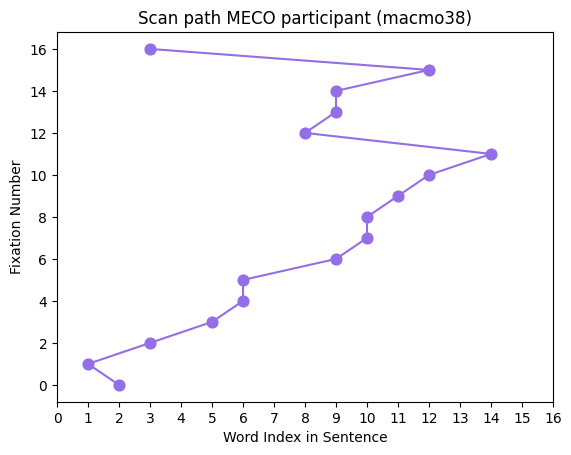

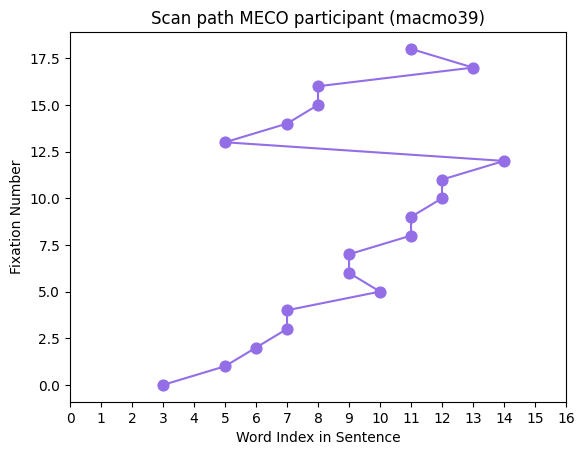

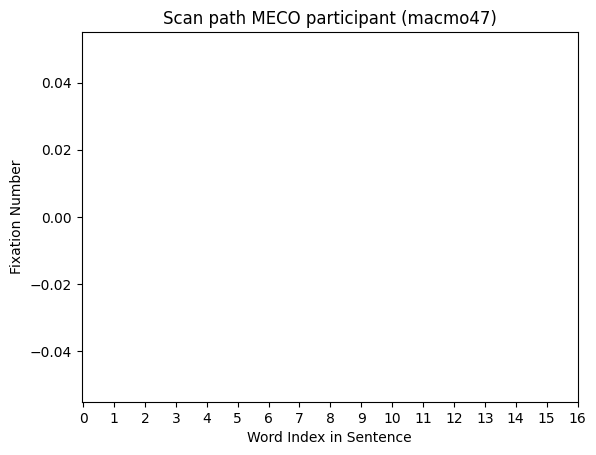

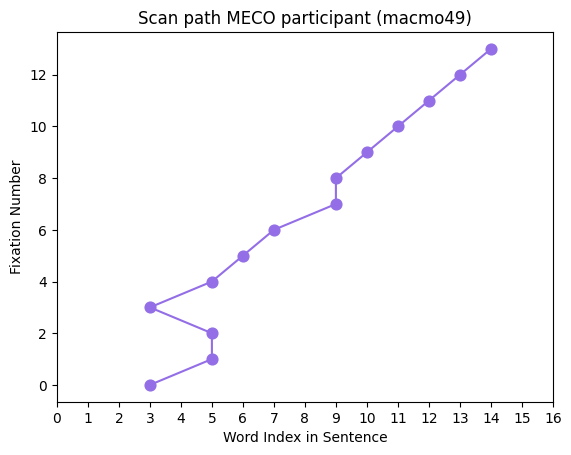

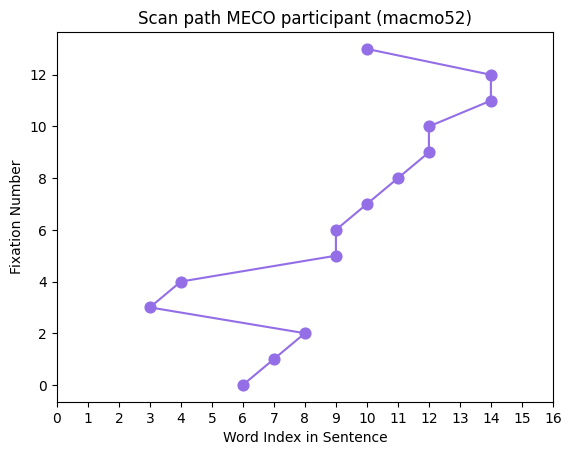

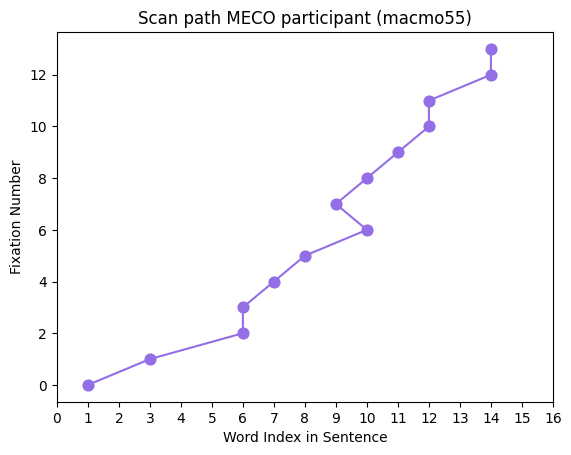

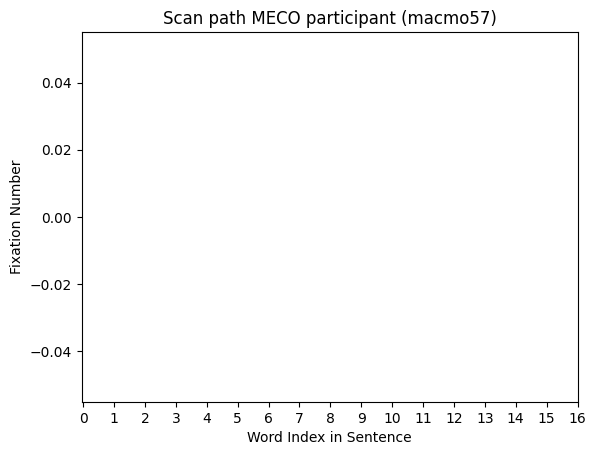

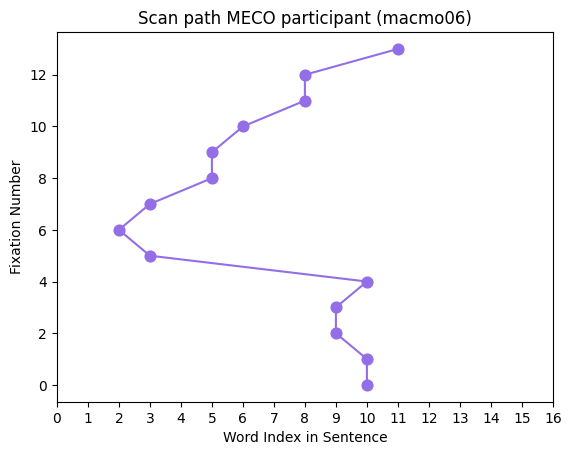

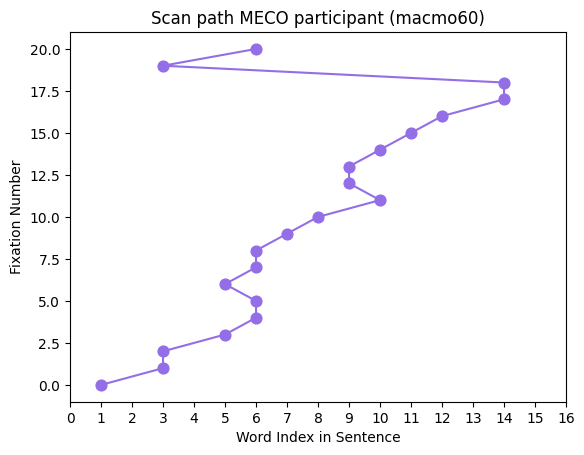

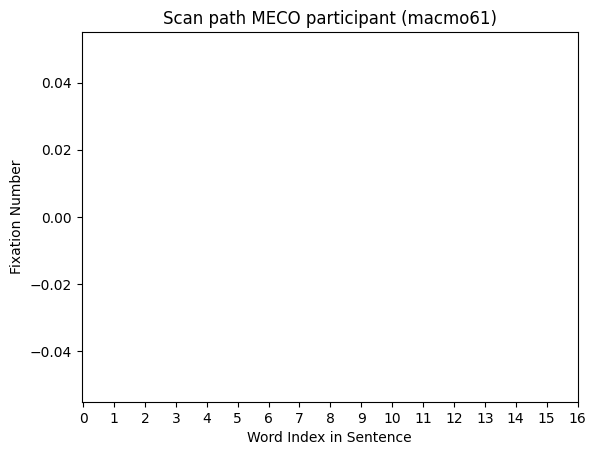

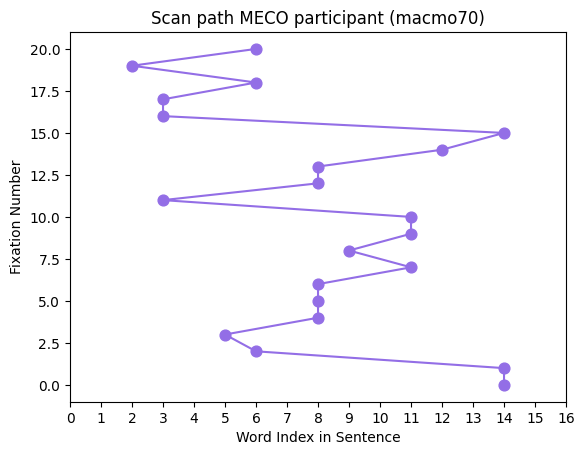

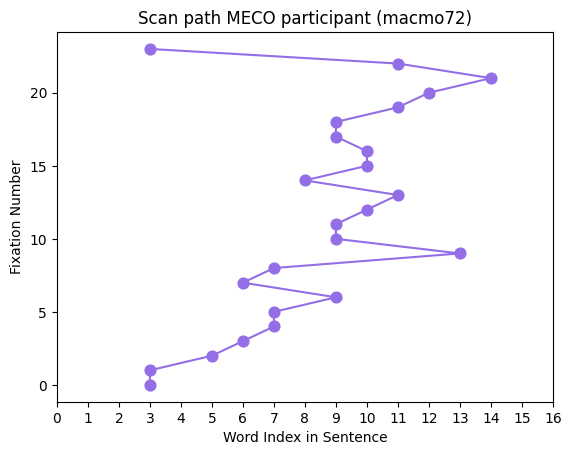

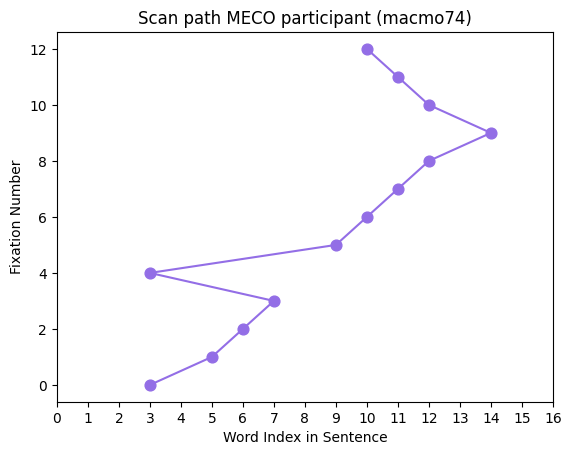

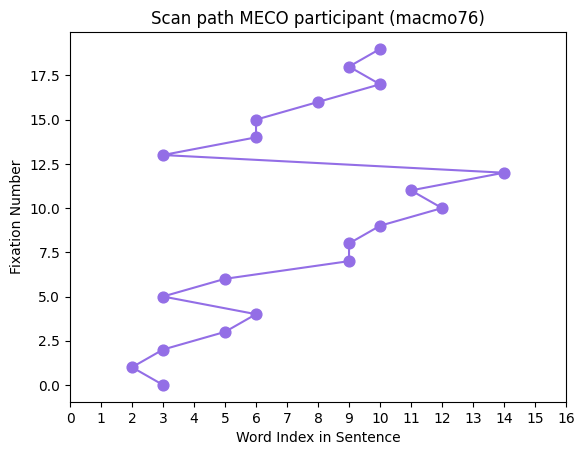

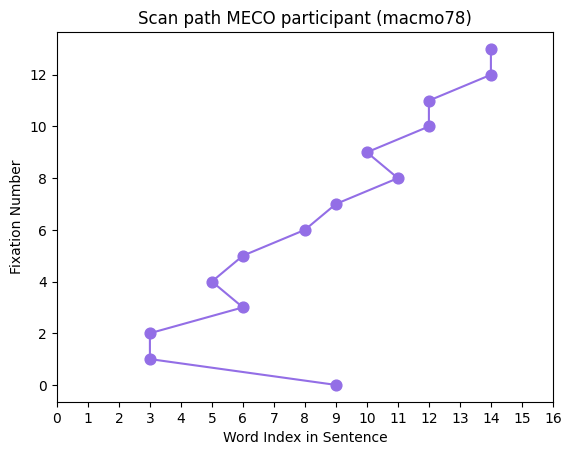

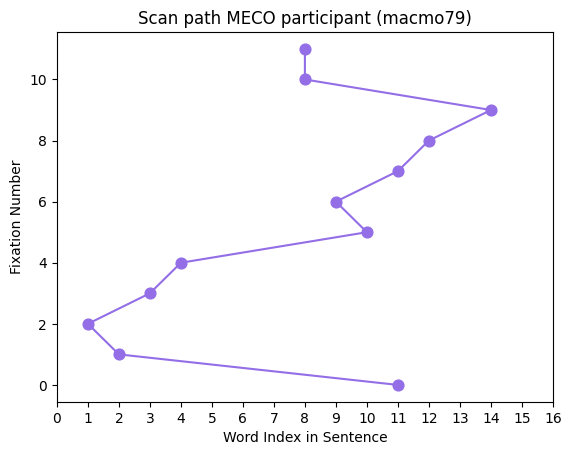

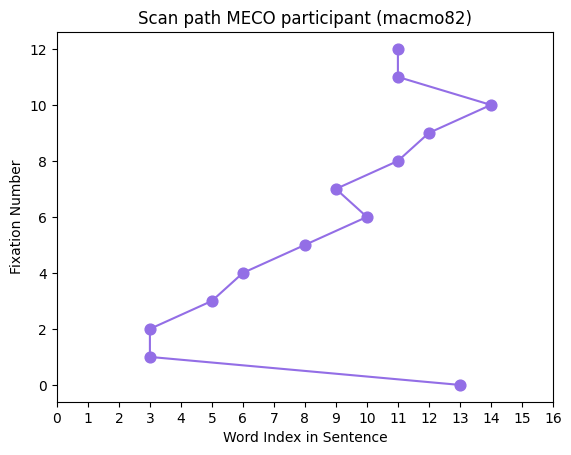

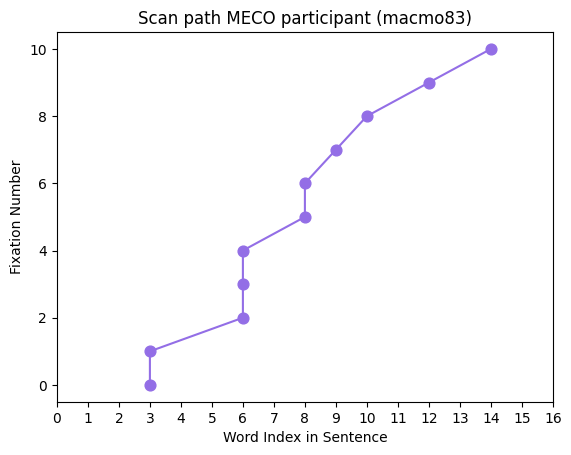

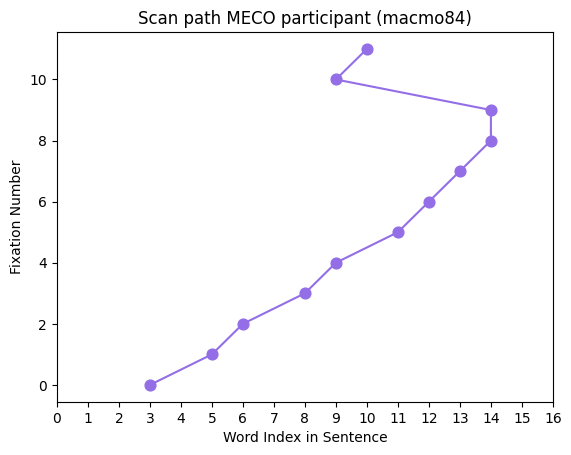

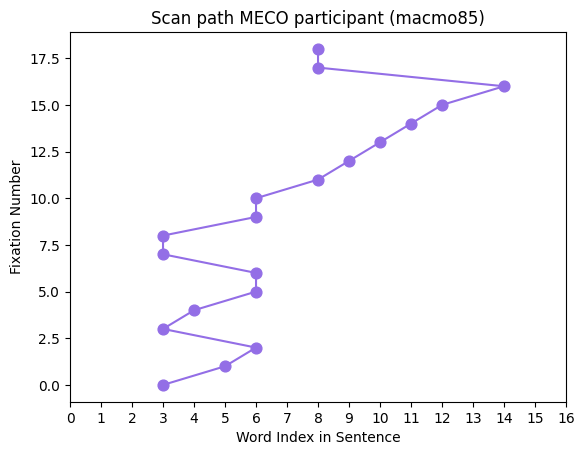

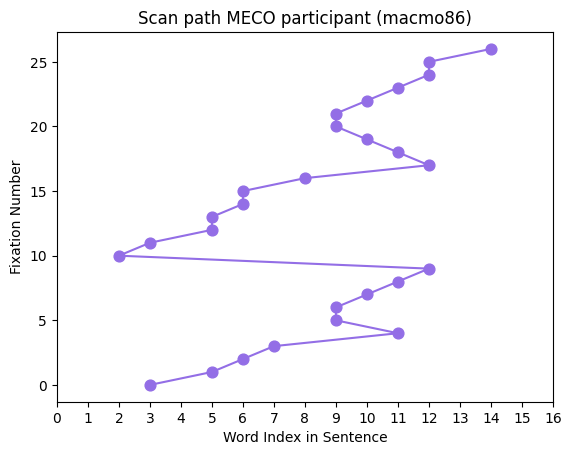

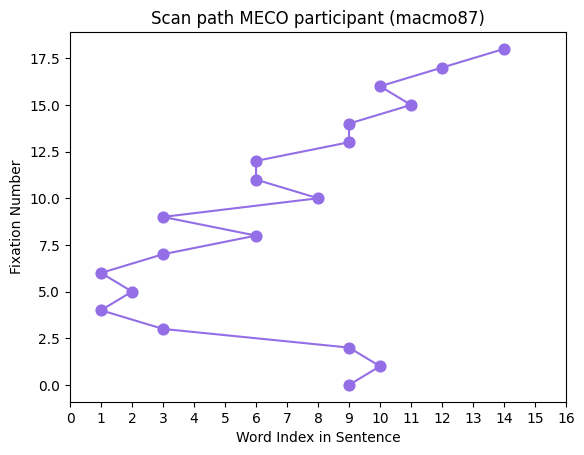

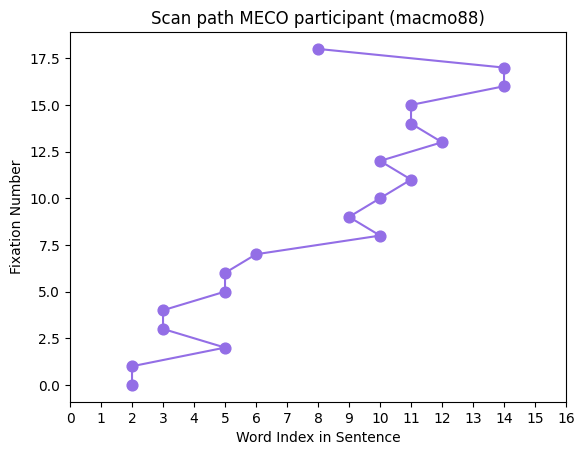

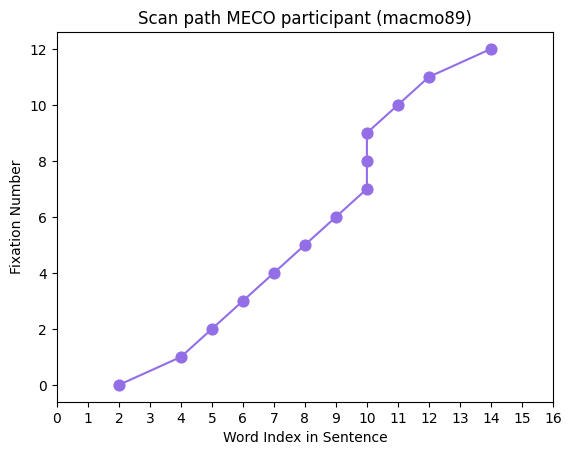

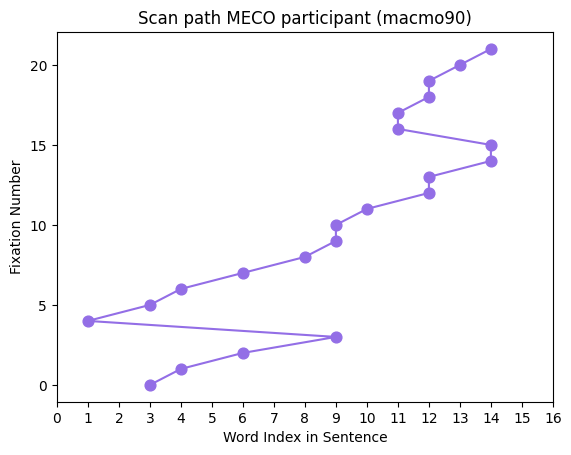

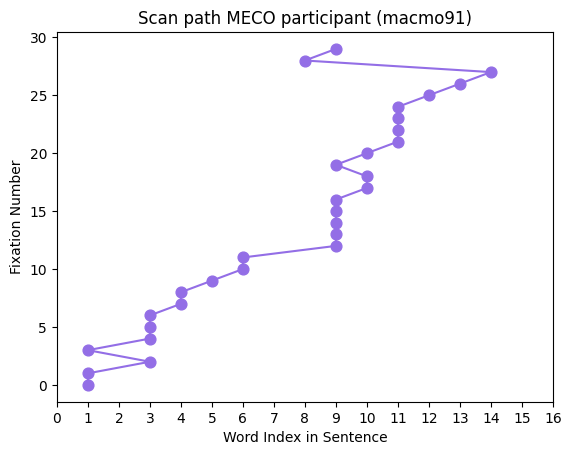

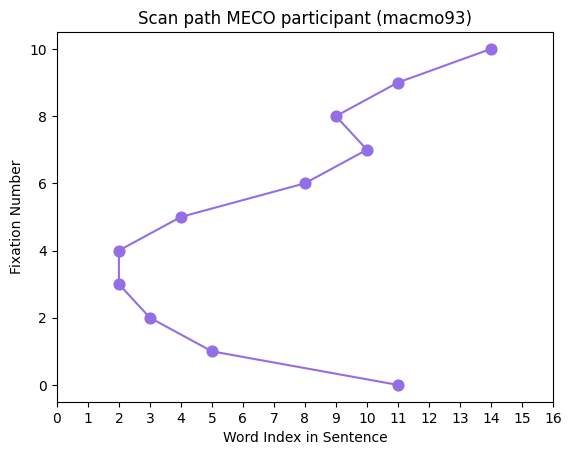

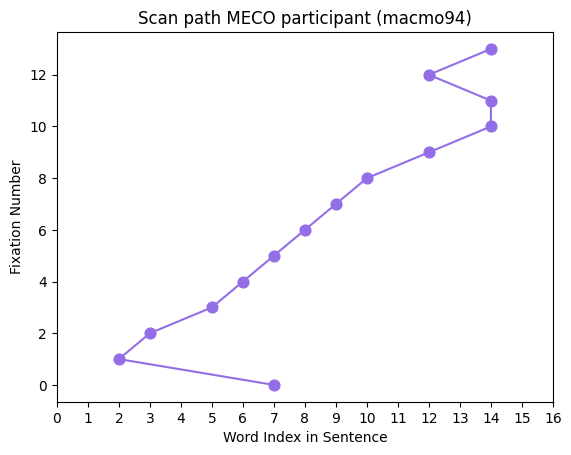

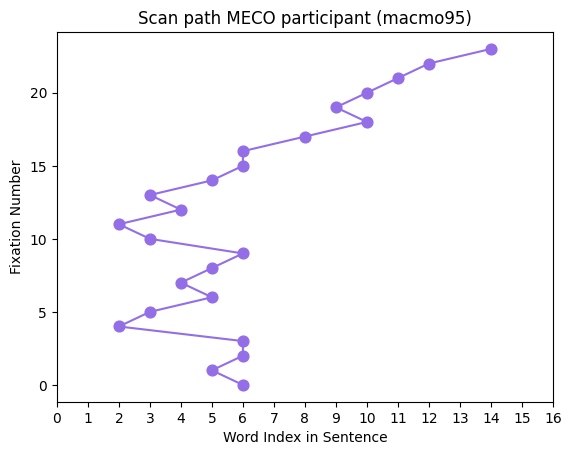

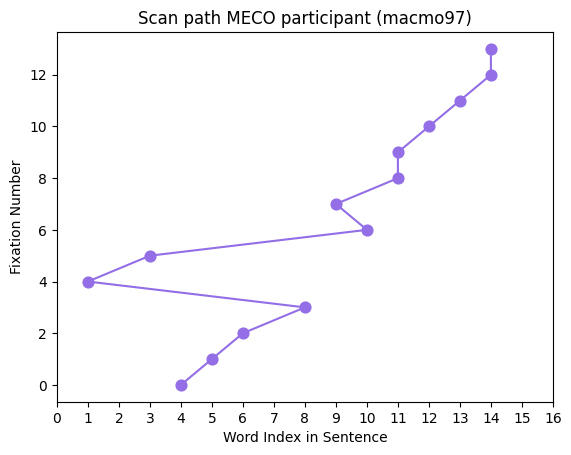

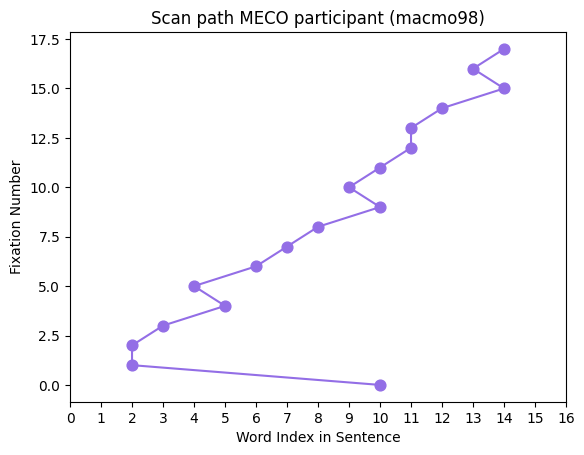

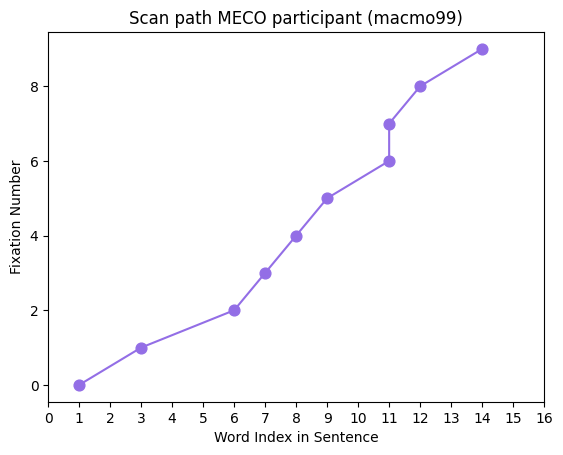

In [22]:
for p in meco_fix_data[meco_fix_data.lang == "en"].subid.unique():
    meco_subject_fixation = meco_fix_data[meco_fix_data.subid == p]
    visualize_fixation_order_meco(meco_subject_fixation, 11, 2, 15)
    plt.title(f"Scan path MECO participant ({p})")
    plt.show()

In [23]:
import os

In [42]:
webQAmGazeParticipants = []
setName = "EN_v03_"
for fixDict in os.listdir(path.join("webcam_meco")):
    if setName in fixDict:
        webQAmGazeParticipants.append(fixDict)

It is involved in data gathering and analysis, research, field projects, advocacy, and education.


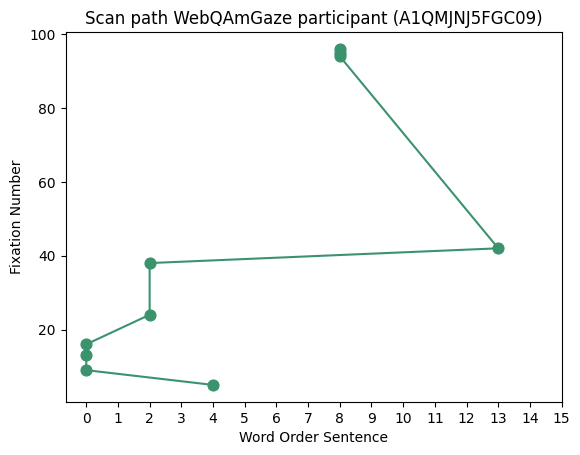

It is involved in data gathering and analysis, research, field projects, advocacy, and education.


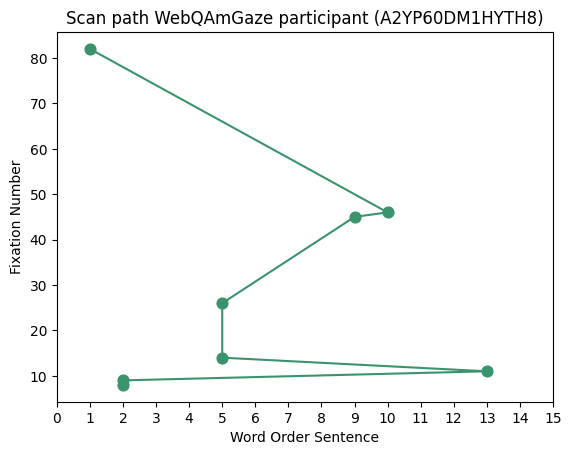

It is involved in data gathering and analysis, research, field projects, advocacy, and education.


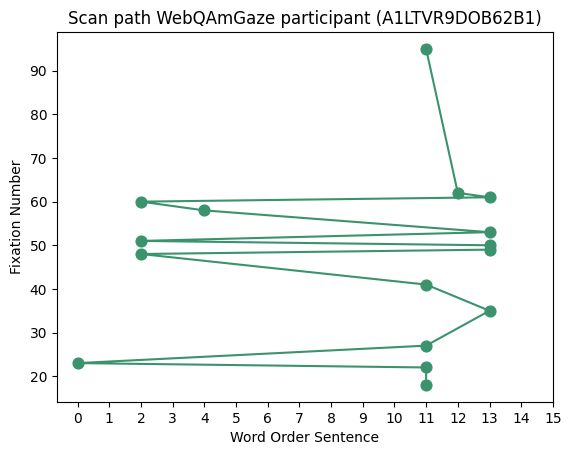

It is involved in data gathering and analysis, research, field projects, advocacy, and education.


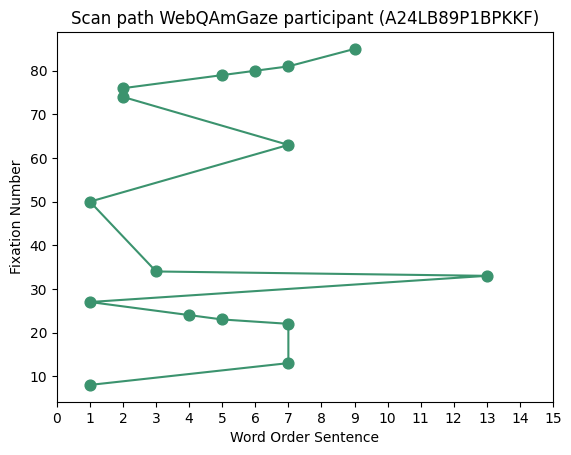

It is involved in data gathering and analysis, research, field projects, advocacy, and education.


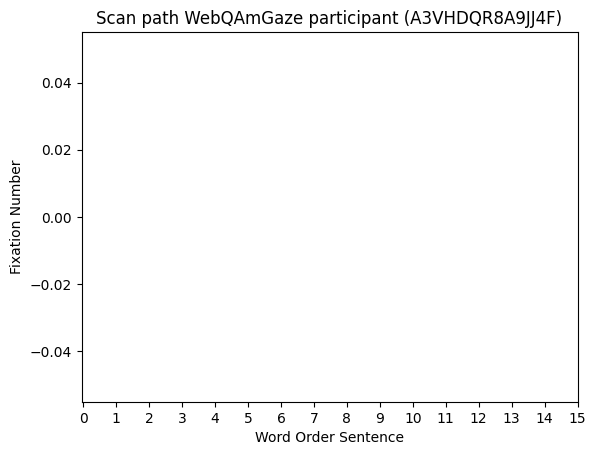

It is involved in data gathering and analysis, research, field projects, advocacy, and education.


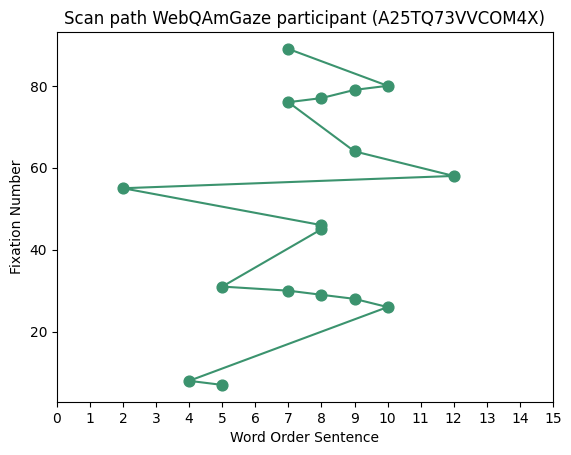

It is involved in data gathering and analysis, research, field projects, advocacy, and education.


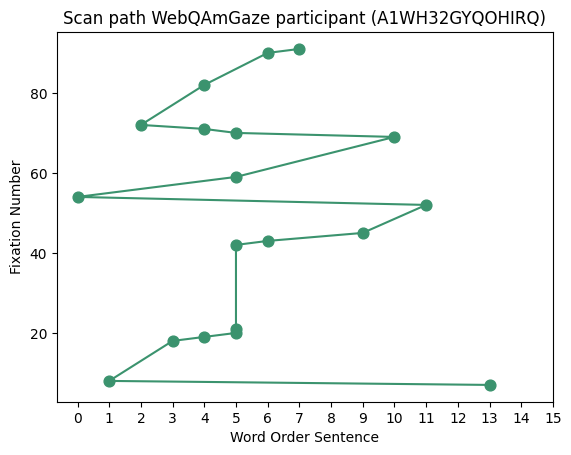

It is involved in data gathering and analysis, research, field projects, advocacy, and education.


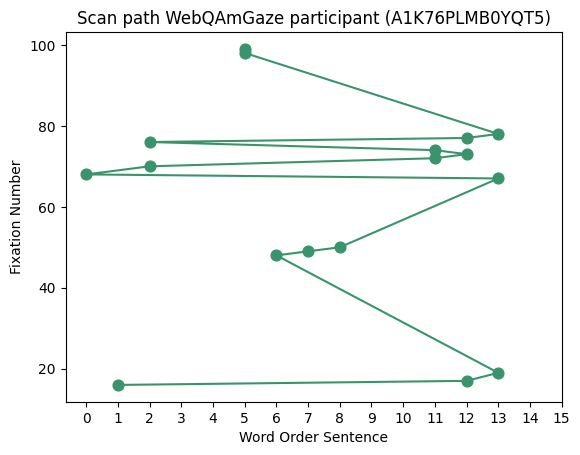

In [43]:
sentSize = 14
for fixDict in webQAmGazeParticipants:
    fix_file = path.join("webcam_meco", fixDict)
    pId = fixDict.split("_")[0]
    df = pd.read_csv(fix_file)
    df = df[df.text_id == "meco_para_11"]
    worker_id = df["worker_id"].values[0]
    visualize_fixation_order(df, sentSize, 2, use_sentence_id=True)
    plt.title(f"Scan path WebQAmGaze participant ({worker_id})")
    plt.show()

In [27]:
webQAmGazeParticipants = []
setName = "mturk_EN_v18"
for fixDict in os.listdir(path.join("..", "pre_processed_data", "fixation_data_per_part")):
    if setName in fixDict:
        webQAmGazeParticipants.append(fixDict)

In [41]:
webQAmGazeParticipants

['EN_v18_0-relfix-feats.csv',
 'EN_v18_1-relfix-feats.csv',
 'EN_v18_10-relfix-feats.csv',
 'EN_v18_11-relfix-feats.csv',
 'EN_v18_12-relfix-feats.csv',
 'EN_v18_13-relfix-feats.csv',
 'EN_v18_14-relfix-feats.csv',
 'EN_v18_15-relfix-feats.csv',
 'EN_v18_16-relfix-feats.csv',
 'EN_v18_17-relfix-feats.csv',
 'EN_v18_18-relfix-feats.csv',
 'EN_v18_19-relfix-feats.csv',
 'EN_v18_2-relfix-feats.csv',
 'EN_v18_20-relfix-feats.csv',
 'EN_v18_21-relfix-feats.csv',
 'EN_v18_22-relfix-feats.csv',
 'EN_v18_3-relfix-feats.csv',
 'EN_v18_4-relfix-feats.csv',
 'EN_v18_5-relfix-feats.csv',
 'EN_v18_6-relfix-feats.csv',
 'EN_v18_7-relfix-feats.csv',
 'EN_v18_8-relfix-feats.csv',
 'EN_v18_9-relfix-feats.csv']

The International Union for Conservation of Nature is an international organization working in the


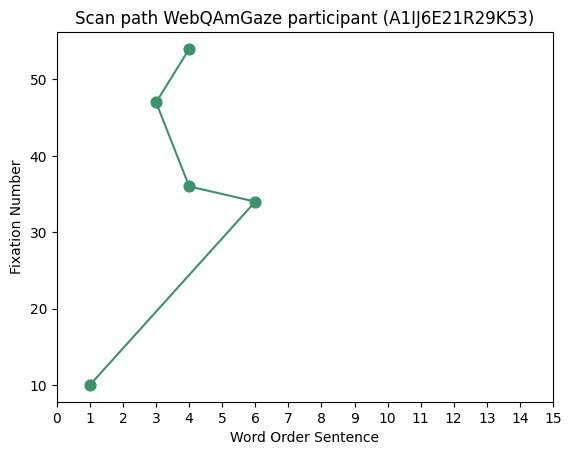

The International Union for Conservation of Nature is an international organization working in the


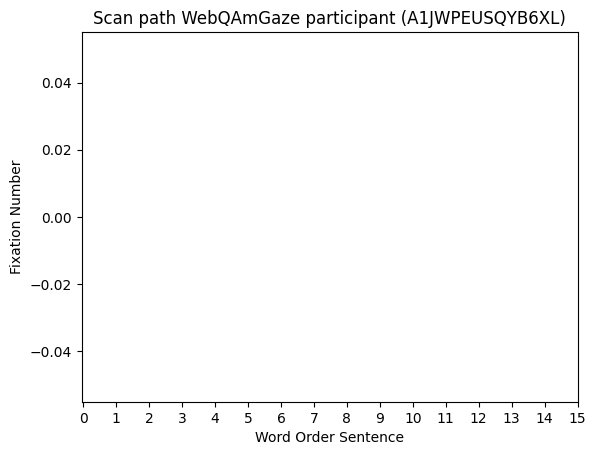

The International Union for Conservation of Nature is an international organization working in the


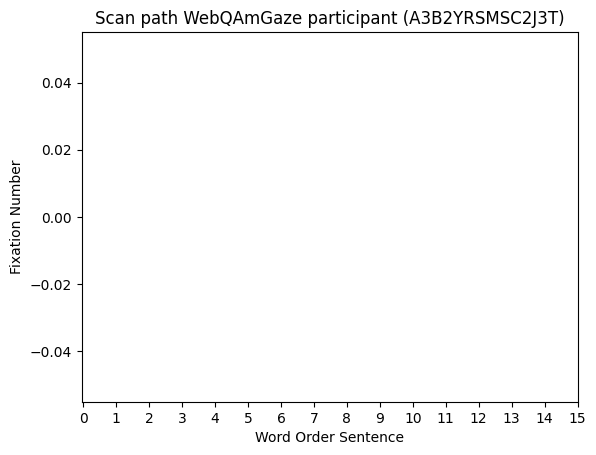

The International Union for Conservation of Nature is an international organization working in the


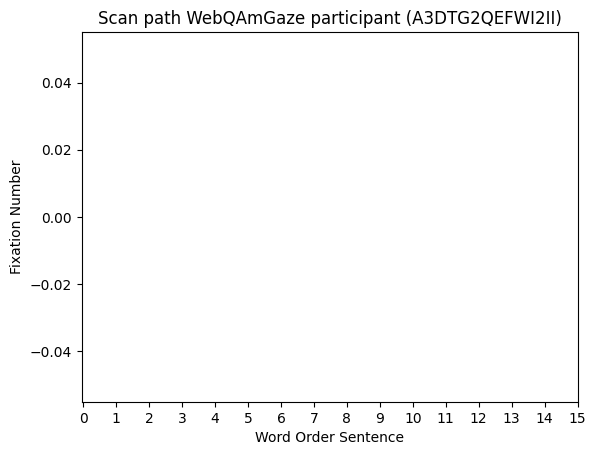

The International Union for Conservation of Nature is an international organization working in the


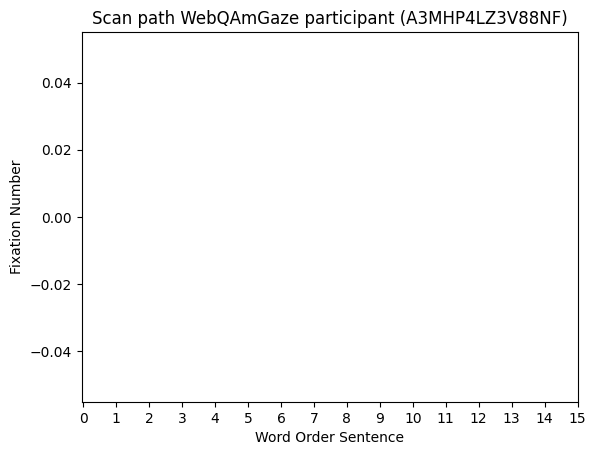

The International Union for Conservation of Nature is an international organization working in the


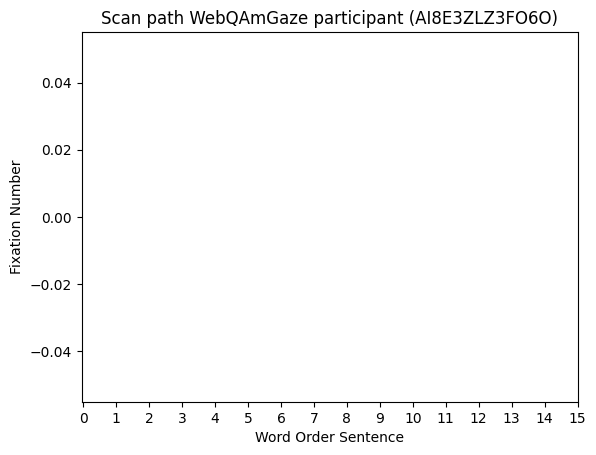

The International Union for Conservation of Nature is an international organization working in the


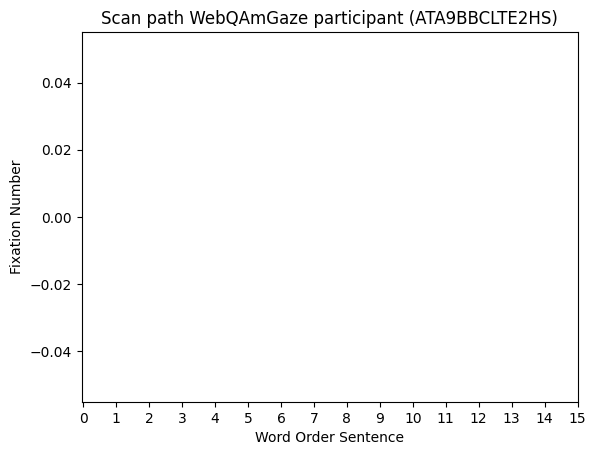

The International Union for Conservation of Nature is an international organization working in the


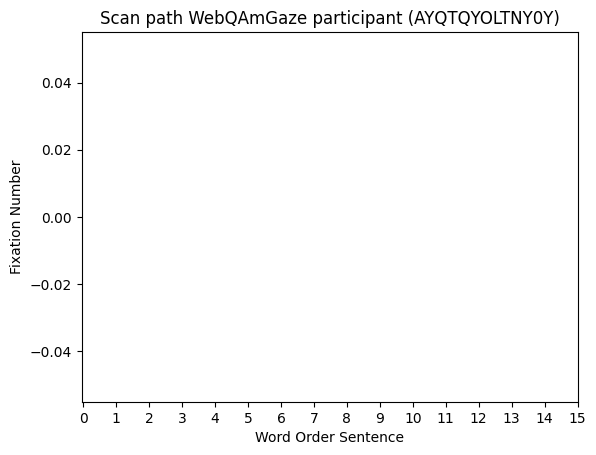

The International Union for Conservation of Nature is an international organization working in the


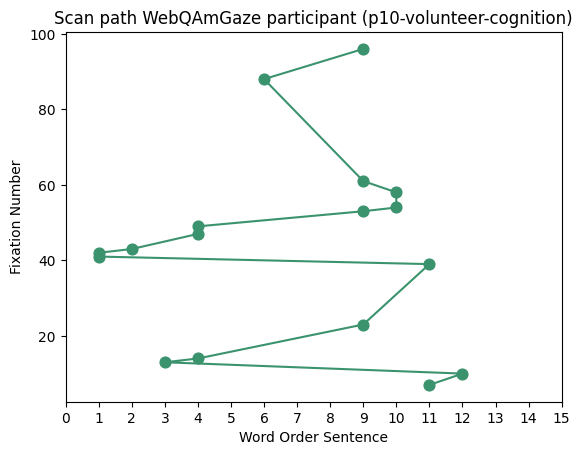

The International Union for Conservation of Nature is an international organization working in the


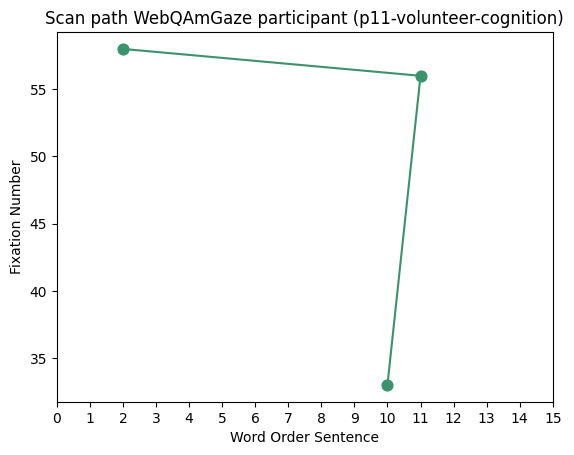

The International Union for Conservation of Nature is an international organization working in the


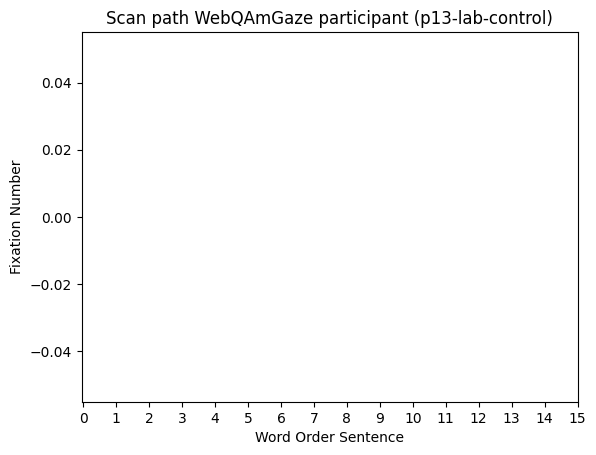

The International Union for Conservation of Nature is an international organization working in the


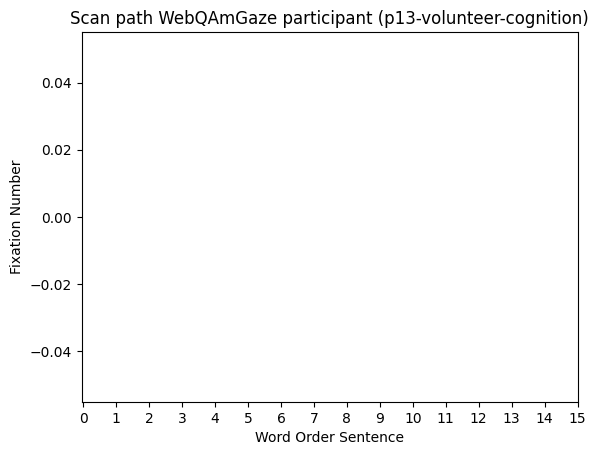

The International Union for Conservation of Nature is an international organization working in the


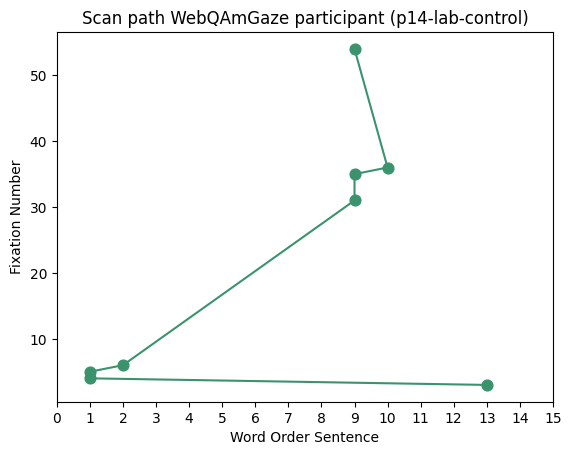

The International Union for Conservation of Nature is an international organization working in the


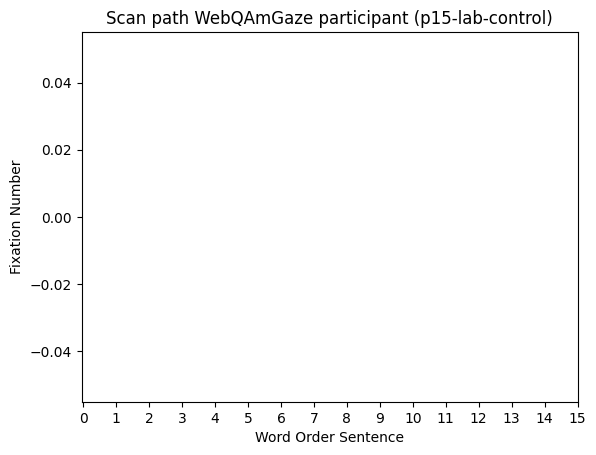

The International Union for Conservation of Nature is an international organization working in the


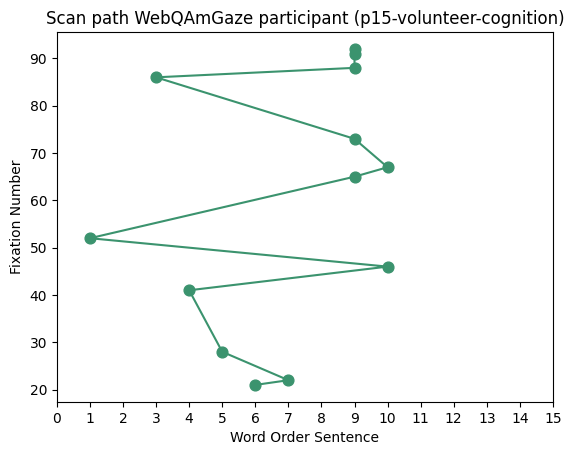

The International Union for Conservation of Nature is an international organization working in the


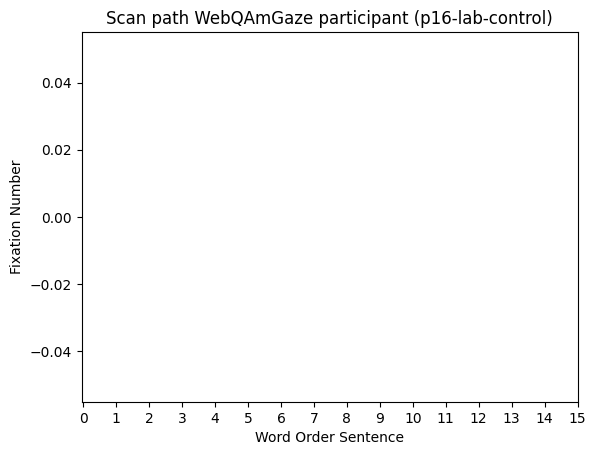

The International Union for Conservation of Nature is an international organization working in the


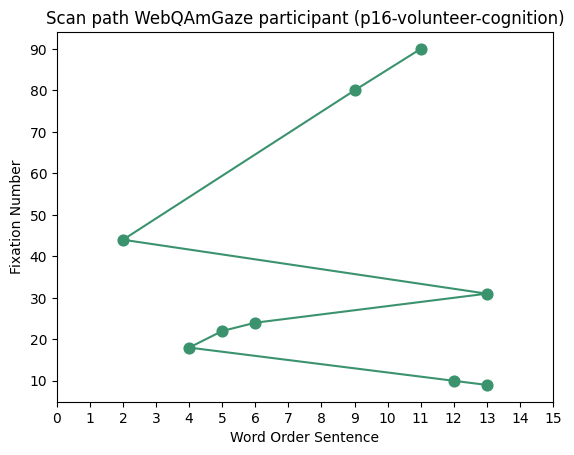

The International Union for Conservation of Nature is an international organization working in the


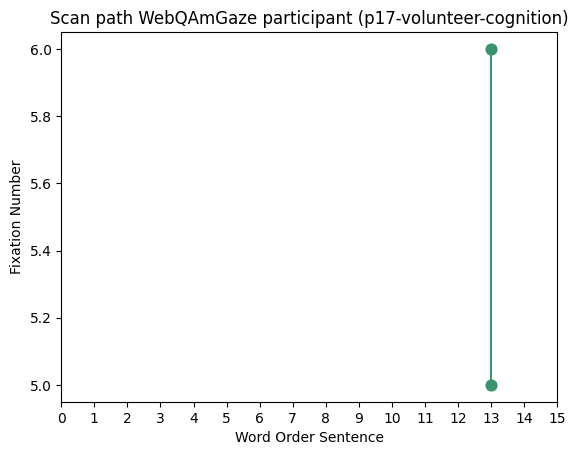

The International Union for Conservation of Nature is an international organization working in the


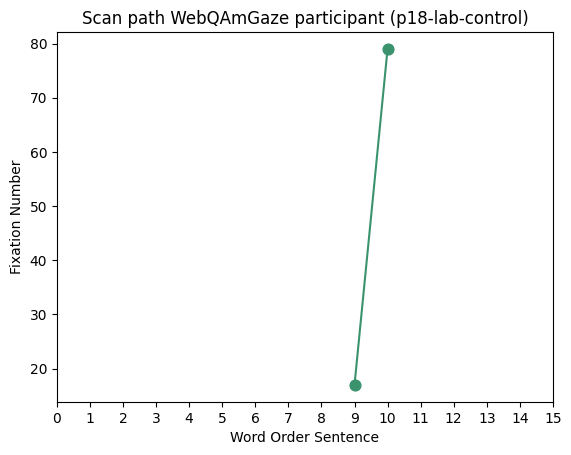

The International Union for Conservation of Nature is an international organization working in the


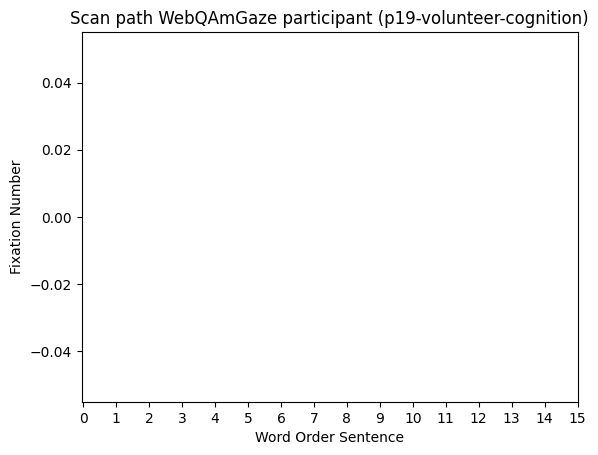

The International Union for Conservation of Nature is an international organization working in the


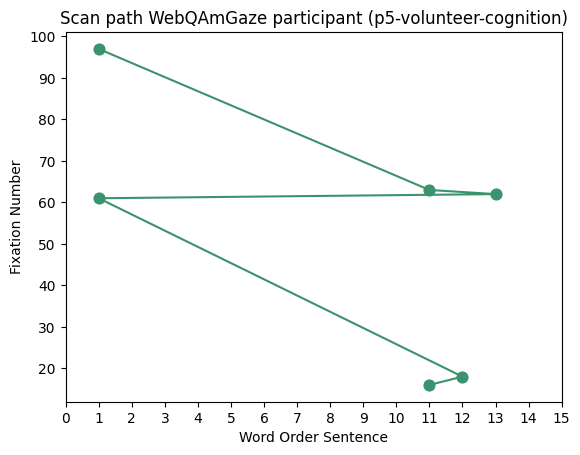

The International Union for Conservation of Nature is an international organization working in the


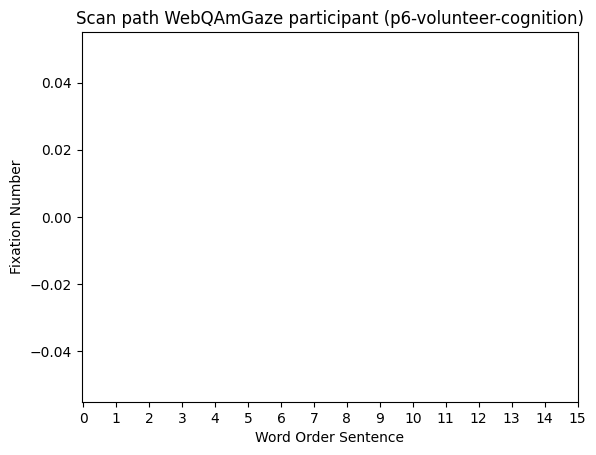

The International Union for Conservation of Nature is an international organization working in the


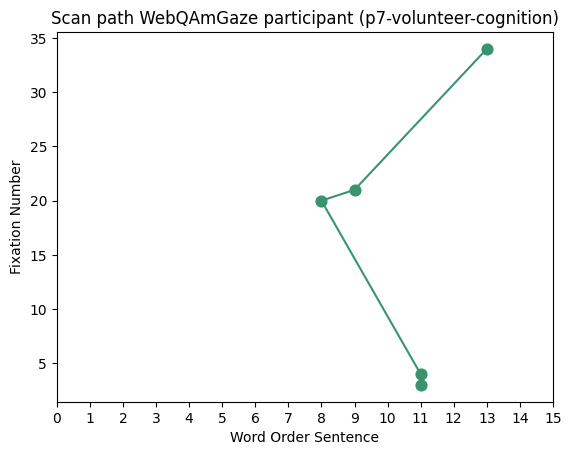

In [30]:
sentSize = 14
for fixDict in webQAmGazeParticipants:
    fix_file = path.join("..", "pre_processed_data", "fixation_data_per_part", fixDict)
    pId = fixDict.split("_")[0]
    df = pd.read_csv(fix_file)
    visualize_fixation_order(df[df.text_id == "meco_para_11"].iloc[:sentSize], sentSize)
    plt.title(f"Scan path WebQAmGaze participant ({pId})")
    plt.show()